<a href="https://colab.research.google.com/github/JavZon/Diabets_Diagnosis_Prediction/blob/main/Diabetes_diagnosis_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic checking**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for **NaN** values and duplicates

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Correlation**

In [8]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Assingning our df as **X** and **y** (label)

In [11]:
X=df.drop(columns='Outcome')
y=df['Outcome'].copy()

**Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X=scaler.fit_transform(X)
X[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

**train_test_split**

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


**ML**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

**GridSearchCV**

In [17]:
from sklearn.model_selection import GridSearchCV
knn_params={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn,knn_params,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [18]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 11}
0.7573637211781954


In [24]:
knn_cv.cv_results_['rank_test_score']

array([19, 18, 15, 17, 14,  2,  6,  8, 13,  9,  1, 11, 10, 16,  5, 12,  4,
        6,  3], dtype=int32)

**Training** model

In [48]:
knn=KNeighborsClassifier(n_neighbors=11) # as GridSearchCV showed k=11 as the best parameter we use k=11
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

**Prediction**

In [49]:
y_pred=knn.predict(X_test)

**Evaluation**

In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('F1 Score:', f1_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test,y_pred))
print('Recall Score:', recall_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score: 0.7272727272727273
F1 Score: 0.5961538461538461
Precision Score: 0.62
Recall Score: 0.5740740740740741
Confusion Matrix:
 [[81 19]
 [23 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



Checking for '**Outcome**' column

In [44]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [45]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

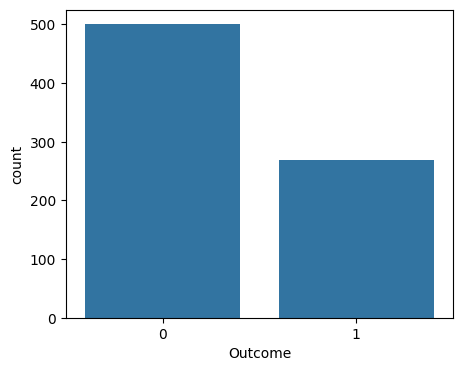

In [47]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome',data=df)
plt.show()

As our dataset is biased towards to 0 (not diabets) we will split our dataset using Stratified Shuffle Split

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(X,y):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [54]:
from sklearn.model_selection import GridSearchCV
knn_params={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn,knn_params,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [55]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7589897374383581


In [56]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [57]:
y_pred=knn.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('F1 Score:', f1_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test,y_pred))
print('Recall Score:', recall_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score: 0.7532467532467533
F1 Score: 0.6041666666666667
Precision Score: 0.6904761904761905
Recall Score: 0.5370370370370371
Confusion Matrix:
 [[87 13]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Evaluation using **cross_val_score**

In [71]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
f1_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='f1')
precision_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='precision')
recall_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='recall')
print(scores.mean())
print(f1_scores.mean())
print(precision_scores.mean())
print(recall_scores.mean())

0.7589897374383581
0.5683437473156865
0.7527830789899757
0.45825027685492803
